# _LDA - Wine Classification_
## _Importing The Required Libraries & Packages_

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import pickle
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

**_Changing The Default Working Directory & Path and Reading The Dataset Using Pandas Command_**

In [2]:
os.chdir('D:\\bala\\study things\\data science\\Batch 74 Day 19\\Batch 74 Day 19\\')
df = pd.read_csv('Wine.csv')
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


## _EDA_
**_Checking the Null values of all the Columns in the dataset_**

In [3]:
df.isnull().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
Customer_Segment        0
dtype: int64

**_Checking the dataset whether its is having a duplicate values or not_**

In [4]:
df.duplicated().sum()

0

## _Data Cleaning_
**_Getting all the column name from the dataset_**

In [5]:
df.columns

Index(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline',
       'Customer_Segment'],
      dtype='object')

**_Renaming the columns for the better readability using customized defined pandas function_**

In [6]:
def rename_columns(df,col_dict):
    return df.rename(columns=col_dict)
col_dict = {'Malic_Acid':'Malic Acid','Ash_Alcanity':'Ash Alcanity','Total_Phenols':'Total Phenols',
           'Nonflavanoid_Phenols':'Non Flavanoid Phenols','Color_Intensity':'Color Intensity',
           'Customer_Segment':'Customer Segment'}
df = rename_columns(df,col_dict)

**_Getting the columns name after renaming to cross check_**

In [7]:
df.columns

Index(['Alcohol', 'Malic Acid', 'Ash', 'Ash Alcanity', 'Magnesium',
       'Total Phenols', 'Flavanoids', 'Non Flavanoid Phenols',
       'Proanthocyanins', 'Color Intensity', 'Hue', 'OD280', 'Proline',
       'Customer Segment'],
      dtype='object')

## _Data Visualization_
**_Getting the value counts from the target variable_**

In [8]:
df['Customer Segment'].value_counts()

2    71
1    59
3    48
Name: Customer Segment, dtype: int64

**_Getting the correlation value from all the numeric columns from the independent variable using seaborn Heatmap & saving the PNG file_**

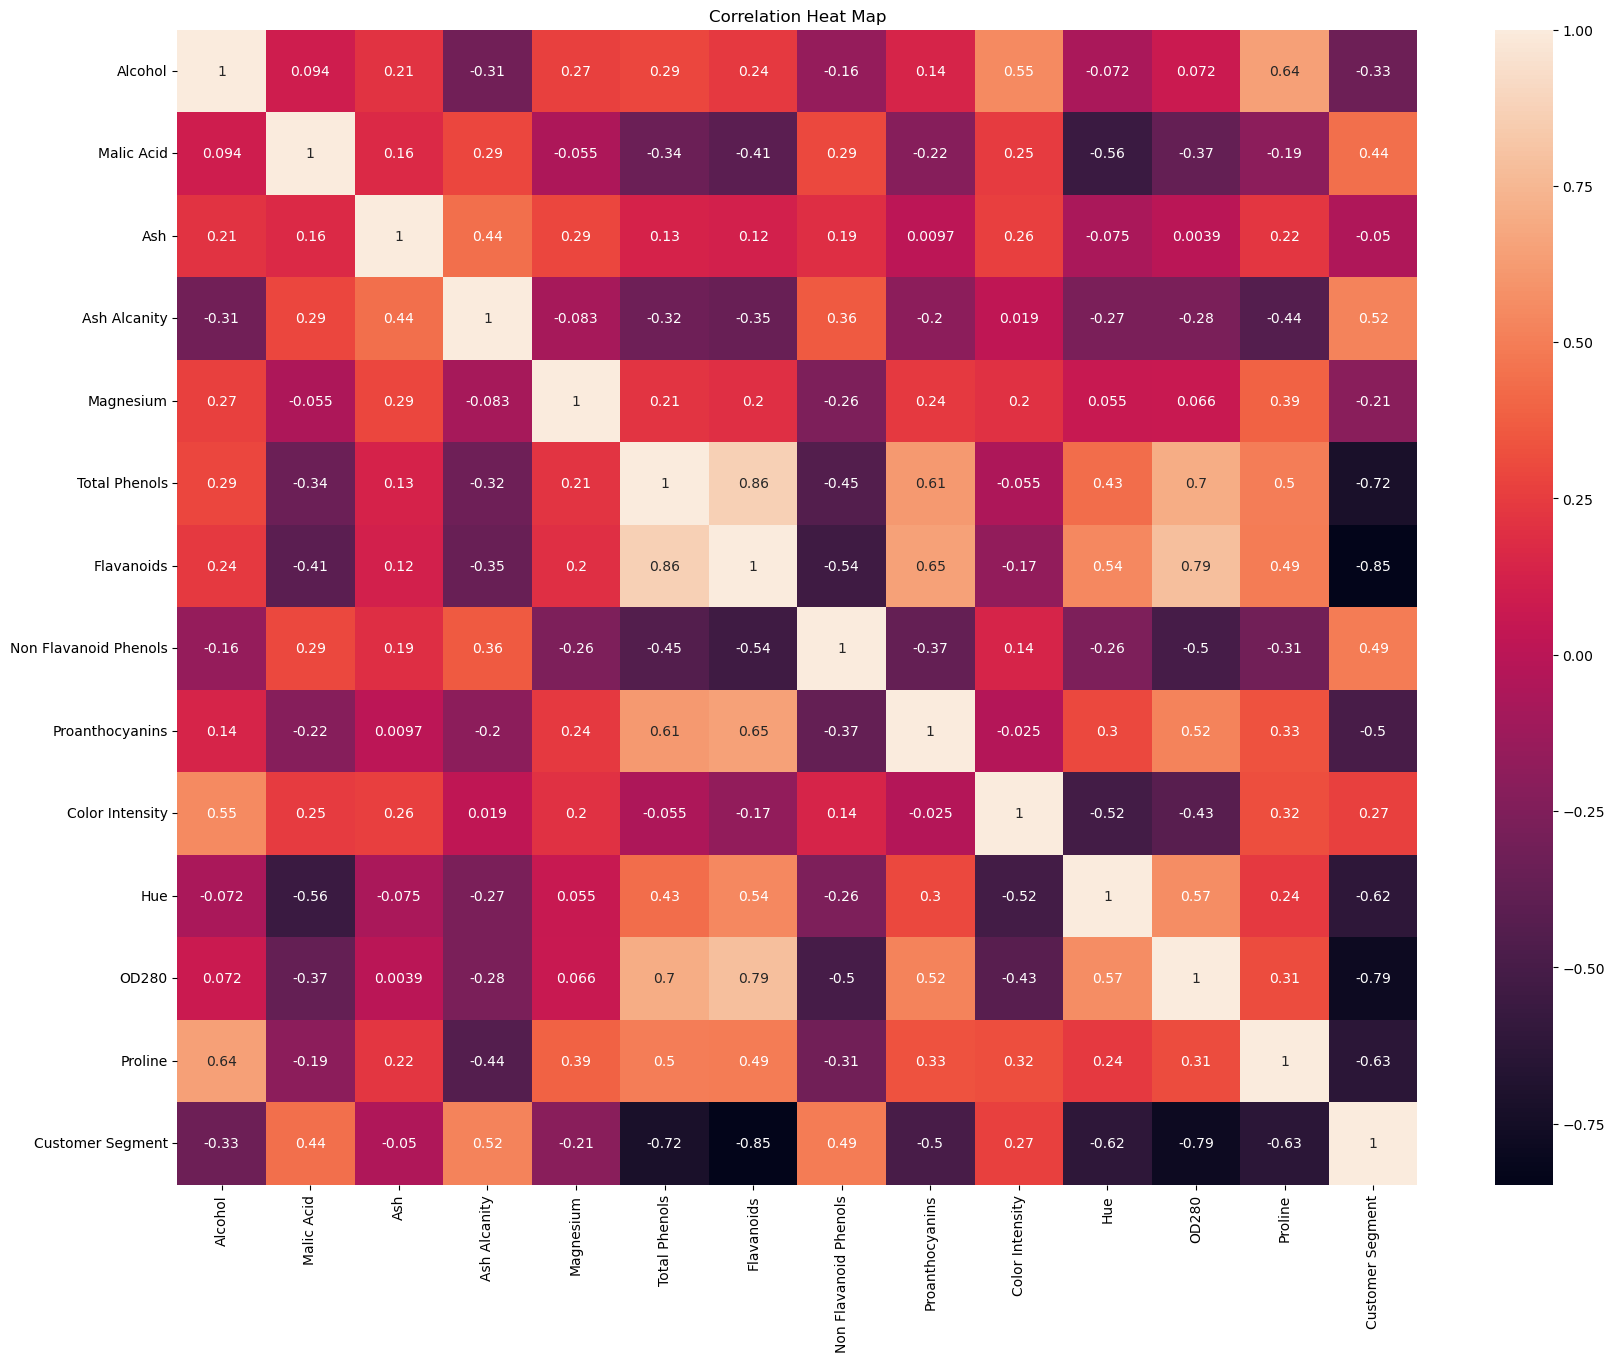

In [9]:
plt.rcParams['figure.figsize']=(20,15)
corr = df.corr()
sns.heatmap(corr,annot=True)
plt.title('Correlation Heat Map')
plt.savefig('Correlation Heat Map.png')
plt.show()

**_Assigning the dependent and independent variables_**

In [11]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

## _Data Preprocessing_
**_Standardizing the independent variable_**

In [12]:
sc_x = StandardScaler()
x = sc_x.fit_transform(x)

## _Model Fitting_
**_Splitting the dependent and independent variable into training and test dataset using train test split._**

In [13]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=15)

**_Fitting the Logistic Regression Model with the dependent train and independent train variable and getting the algorithm,accuracy score,classification report and confusion matrix between the predicted values and dependent test dataset_**

In [14]:
LR = LogisticRegression()
LR.fit(x_train,y_train)
y_pred = LR.predict(x_test)
print('Accuracy Score {}%'.format(100*accuracy_score(y_pred,y_test)))
print('\n Classification Report',classification_report(y_test,y_pred))
print('\n Confusion Matrix',confusion_matrix(y_test,y_pred))

Accuracy Score 100.0%

 Classification Report               precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00        12
           3       1.00      1.00      1.00        12

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36


 Confusion Matrix [[12  0  0]
 [ 0 12  0]
 [ 0  0 12]]


**_Fitting the Random Forest Classifier Model with the dependent train and independent train variable and getting the algorithm,accuracy score,classification report and confusion matrix between the predicted values and dependent test dataset_**

In [15]:
RF = RandomForestClassifier(n_estimators=24,random_state=10)
RF.fit(x_train,y_train)
RF_pred = RF.predict(x_test)
print('Accuracy Score {}%'.format(100*accuracy_score(RF_pred,y_test)))
print('\n Classification Report',classification_report(y_test,RF_pred))
print('\n Confusion Matrix',confusion_matrix(y_test,RF_pred))

Accuracy Score 97.22222222222221%

 Classification Report               precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       0.92      1.00      0.96        12
           3       1.00      0.92      0.96        12

    accuracy                           0.97        36
   macro avg       0.97      0.97      0.97        36
weighted avg       0.97      0.97      0.97        36


 Confusion Matrix [[12  0  0]
 [ 0 12  0]
 [ 0  1 11]]


**_Fitting the Extra Tree Classifier Model with the dependent train and independent train variable and getting the algorithm,accuracy score,classification report and confusion matrix between the predicted values and dependent test dataset_**

In [16]:
ET = ExtraTreesClassifier(n_estimators=24,random_state=10)
ET.fit(x_train,y_train)
ET_pred = ET.predict(x_test)
print('Accuracy Score {}%'.format(100*accuracy_score(ET_pred,y_test)))
print('\n Classification Report',classification_report(y_test,ET_pred))
print('\n Confusion Matrix',confusion_matrix(y_test,ET_pred))

Accuracy Score 100.0%

 Classification Report               precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00        12
           3       1.00      1.00      1.00        12

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36


 Confusion Matrix [[12  0  0]
 [ 0 12  0]
 [ 0  0 12]]


**_Fitting the CatBoost Classifier Model with the dependent train and independent train variable and getting the algorithm,accuracy score,classification report and confusion matrix between the predicted values and dependent test dataset_**

In [17]:
cat = CatBoostClassifier(verbose=0)
cat.fit(x_train,y_train)
y_pred = cat.predict(x_test)
print('Accuracy Score {}%'.format(100*accuracy_score(y_pred,y_test)))
print('\n Classification Report',classification_report(y_test,y_pred))
print('\n Confusion Matrix',confusion_matrix(y_test,y_pred))

Accuracy Score 100.0%

 Classification Report               precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00        12
           3       1.00      1.00      1.00        12

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36


 Confusion Matrix [[12  0  0]
 [ 0 12  0]
 [ 0  0 12]]


**_Fitting the LightGBM Classifier Model with the dependent train and independent train variable and getting the algorithm,accuracy score,classification report and confusion matrix between the predicted values and dependent test dataset_**

In [18]:
lightgbm = LGBMClassifier()
lightgbm.fit(x_train,y_train)
y_pred = lightgbm.predict(x_test)
print('Accuracy Score {}%'.format(100*accuracy_score(y_pred,y_test)))
print('\n Classification Report',classification_report(y_test,y_pred))
print('\n Confusion Matrix',confusion_matrix(y_test,y_pred))

Accuracy Score 100.0%

 Classification Report               precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00        12
           3       1.00      1.00      1.00        12

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36


 Confusion Matrix [[12  0  0]
 [ 0 12  0]
 [ 0  0 12]]


## Dimensional Reduction
**_Processing the independent variable with principal component analysis to get the importance of all the columns in the independent variable and Getting the numeric value for the importance of column of the independent variable_**

In [19]:
pca = PCA()
pca_x = pca.fit_transform(x)
pca.explained_variance_ratio_

array([0.36198848, 0.1920749 , 0.11123631, 0.0706903 , 0.06563294,
       0.04935823, 0.04238679, 0.02680749, 0.02222153, 0.01930019,
       0.01736836, 0.01298233, 0.00795215])

**_Splitting the dependent and independent variable into training and test dataset using train test split of the independent variable_**

In [20]:
pca_x_train,pca_x_test,y_train,y_test = train_test_split(pca_x,y,test_size=0.2,random_state=15)

**_Fitting the Logistic Regression Model with the dependent train and independent train variable and getting the algorithm,accuracy score,classification report and confusion matrix between the predicted values and dependent test dataset_**

In [21]:
LR_pca = LogisticRegression()
LR_pca.fit(pca_x_train,y_train)
y_pred = LR_pca.predict(pca_x_test)
print('Accuracy Score {}%'.format(100*accuracy_score(y_pred,y_test)))
print('\n Classification Report',classification_report(y_test,y_pred))
print('\n Confusion Matrix',confusion_matrix(y_test,y_pred))

Accuracy Score 100.0%

 Classification Report               precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00        12
           3       1.00      1.00      1.00        12

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36


 Confusion Matrix [[12  0  0]
 [ 0 12  0]
 [ 0  0 12]]


**_Fitting the Random Forest Classifier Model with the dependent train and independent train variable and getting the algorithm,accuracy score,classification report and confusion matrix between the predicted values and dependent test dataset_**

In [22]:
RF_pca = RandomForestClassifier(n_estimators=24,random_state=10)
RF_pca.fit(pca_x_train,y_train)
RF_pred = RF_pca.predict(pca_x_test)
print('Accuracy Score {}%'.format(100*accuracy_score(RF_pred,y_test)))
print('\n Classification Report',classification_report(y_test,RF_pred))
print('\n Confusion Matrix',confusion_matrix(y_test,RF_pred))

Accuracy Score 97.22222222222221%

 Classification Report               precision    recall  f1-score   support

           1       0.92      1.00      0.96        12
           2       1.00      0.92      0.96        12
           3       1.00      1.00      1.00        12

    accuracy                           0.97        36
   macro avg       0.97      0.97      0.97        36
weighted avg       0.97      0.97      0.97        36


 Confusion Matrix [[12  0  0]
 [ 1 11  0]
 [ 0  0 12]]


**_Fitting the Extra Tree Classifer Model with the dependent train and independent train variable and getting the algorithm,accuracy score,classification report and confusion matrix between the predicted values and dependent test dataset_**

In [23]:
ET_pca = ExtraTreesClassifier(n_estimators=24,random_state=10)
ET_pca.fit(pca_x_train,y_train)
ET_pred = ET_pca.predict(pca_x_test)
print('Accuracy Score {}%'.format(100*accuracy_score(ET_pred,y_test)))
print('\n Classification Report',classification_report(y_test,ET_pred))
print('\n Confusion Matrix',confusion_matrix(y_test,ET_pred))

Accuracy Score 100.0%

 Classification Report               precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00        12
           3       1.00      1.00      1.00        12

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36


 Confusion Matrix [[12  0  0]
 [ 0 12  0]
 [ 0  0 12]]


**_Fitting the Cat Boost Classifier Model with the dependent train and independent train variable and getting the algorithm,accuracy score,classification report and confusion matrix between the predicted values and dependent test dataset_**

In [24]:
cat_pca = CatBoostClassifier(verbose=0)
cat_pca.fit(pca_x_train,y_train)
y_pred = cat_pca.predict(pca_x_test)
print('Accuracy Score {}%'.format(100*accuracy_score(y_pred,y_test)))
print('\n Classification Report',classification_report(y_test,y_pred))
print('\n Confusion Matrix',confusion_matrix(y_test,y_pred))

Accuracy Score 97.22222222222221%

 Classification Report               precision    recall  f1-score   support

           1       0.92      1.00      0.96        12
           2       1.00      0.92      0.96        12
           3       1.00      1.00      1.00        12

    accuracy                           0.97        36
   macro avg       0.97      0.97      0.97        36
weighted avg       0.97      0.97      0.97        36


 Confusion Matrix [[12  0  0]
 [ 1 11  0]
 [ 0  0 12]]


**_Fitting the LightGBM Classifier Model with the dependent train and independent train variable and getting the algorithm,accuracy score,classification report and confusion matrix between the predicted values and dependent test dataset_**

In [25]:
lightgbm_pca = LGBMClassifier()
lightgbm_pca.fit(pca_x_train,y_train)
y_pred = lightgbm_pca.predict(pca_x_test)
print('Accuracy Score {}%'.format(100*accuracy_score(y_pred,y_test)))
print('\n Classification Report',classification_report(y_test,y_pred))
print('\n Confusion Matrix',confusion_matrix(y_test,y_pred))

Accuracy Score 94.44444444444444%

 Classification Report               precision    recall  f1-score   support

           1       0.92      1.00      0.96        12
           2       0.92      0.92      0.92        12
           3       1.00      0.92      0.96        12

    accuracy                           0.94        36
   macro avg       0.95      0.94      0.94        36
weighted avg       0.95      0.94      0.94        36


 Confusion Matrix [[12  0  0]
 [ 1 11  0]
 [ 0  1 11]]


**_Processing the independent variable with principal component analysis of 2 components to get the importance of all the columns in the independent variable and Getting the numeric value for the importance of column of the independent variable after reducing its dimension_**

In [26]:
pca1 = PCA(n_components=2)
pca_x1 = pca1.fit_transform(x)
pca1.explained_variance_ratio_

array([0.36198848, 0.1920749 ])

**_Splitting the dependent and independent variable into training and test dataset using train test split after reducing its dimension of the independent variable_**

In [27]:
pca_x_train1,pca_x_test1,y_train,y_test = train_test_split(pca_x1,y,test_size=0.2,random_state=15)

**_Fitting the Logistic Regression Model with the dependent train and independent train variable and getting the algorithm,accuracy score,classification report and confusion matrix between the predicted values and dependent test dataset after, reducing the dimensions of the independent variable_**

In [28]:
LR_pca1 = LogisticRegression()
LR_pca1.fit(pca_x_train1,y_train)
y_pred = LR_pca1.predict(pca_x_test1)
print('Accuracy Score {}%'.format(100*accuracy_score(y_pred,y_test)))
print('\n Classification Report',classification_report(y_test,y_pred))
print('\n Confusion Matrix',confusion_matrix(y_test,y_pred))

Accuracy Score 97.22222222222221%

 Classification Report               precision    recall  f1-score   support

           1       0.92      1.00      0.96        12
           2       1.00      0.92      0.96        12
           3       1.00      1.00      1.00        12

    accuracy                           0.97        36
   macro avg       0.97      0.97      0.97        36
weighted avg       0.97      0.97      0.97        36


 Confusion Matrix [[12  0  0]
 [ 1 11  0]
 [ 0  0 12]]


**_Fitting the Random Forest Classifier Model with the dependent train and independent train variable and getting the algorithm,accuracy score,classification report and confusion matrix between the predicted values and dependent test dataset after, reducing the dimensions of the independent variable_**

In [29]:
RF_pca1 = RandomForestClassifier(n_estimators=24,random_state=10)
RF_pca1.fit(pca_x_train1,y_train)
RF_pred = RF_pca1.predict(pca_x_test1)
print('Accuracy Score {}%'.format(100*accuracy_score(RF_pred,y_test)))
print('\n Classification Report',classification_report(y_test,RF_pred))
print('\n Confusion Matrix',confusion_matrix(y_test,RF_pred))

Accuracy Score 91.66666666666666%

 Classification Report               precision    recall  f1-score   support

           1       0.86      1.00      0.92        12
           2       0.91      0.83      0.87        12
           3       1.00      0.92      0.96        12

    accuracy                           0.92        36
   macro avg       0.92      0.92      0.92        36
weighted avg       0.92      0.92      0.92        36


 Confusion Matrix [[12  0  0]
 [ 2 10  0]
 [ 0  1 11]]


**_Fitting the Extra Tree Classifier Model with the dependent train and independent train variable and getting the algorithm,accuracy score,classification report and confusion matrix between the predicted values and dependent test dataset after, reducing the dimensions of the independent variable_**

In [30]:
ET_pca1 = ExtraTreesClassifier(n_estimators=24,random_state=10)
ET_pca1.fit(pca_x_train1,y_train)
ET_pred = ET_pca1.predict(pca_x_test1)
print('Accuracy Score {}%'.format(100*accuracy_score(ET_pred,y_test)))
print('\n Classification Report',classification_report(y_test,ET_pred))
print('\n Confusion Matrix',confusion_matrix(y_test,ET_pred))

Accuracy Score 91.66666666666666%

 Classification Report               precision    recall  f1-score   support

           1       0.86      1.00      0.92        12
           2       0.91      0.83      0.87        12
           3       1.00      0.92      0.96        12

    accuracy                           0.92        36
   macro avg       0.92      0.92      0.92        36
weighted avg       0.92      0.92      0.92        36


 Confusion Matrix [[12  0  0]
 [ 2 10  0]
 [ 0  1 11]]


**_Fitting the Cat Boost Classifier Model with the dependent train and independent train variable and getting the algorithm,accuracy score,classification report and confusion matrix between the predicted values and dependent test dataset after, reducing the dimensions of the independent variable_**

In [31]:
cat_pca1 = CatBoostClassifier(verbose=0)
cat_pca1.fit(pca_x_train1,y_train)
y_pred = cat_pca1.predict(pca_x_test1)
print('Accuracy Score {}%'.format(100*accuracy_score(y_pred,y_test)))
print('\n Classification Report',classification_report(y_test,y_pred))
print('\n Confusion Matrix',confusion_matrix(y_test,y_pred))

Accuracy Score 88.88888888888889%

 Classification Report               precision    recall  f1-score   support

           1       0.86      1.00      0.92        12
           2       0.83      0.83      0.83        12
           3       1.00      0.83      0.91        12

    accuracy                           0.89        36
   macro avg       0.90      0.89      0.89        36
weighted avg       0.90      0.89      0.89        36


 Confusion Matrix [[12  0  0]
 [ 2 10  0]
 [ 0  2 10]]


**_Fitting the LightGBM Classifier Model with the dependent train and independent train variable and getting the algorithm,accuracy score,classification report and confusion matrix between the predicted values and dependent test dataset after, reducing the dimensions of the independent variable_**

In [32]:
lightgbm_pca1 = LGBMClassifier()
lightgbm_pca1.fit(pca_x_train1,y_train)
y_pred = lightgbm_pca1.predict(pca_x_test1)
print('Accuracy Score {}%'.format(100*accuracy_score(y_pred,y_test)))
print('\n Classification Report',classification_report(y_test,y_pred))
print('\n Confusion Matrix',confusion_matrix(y_test,y_pred))

Accuracy Score 88.88888888888889%

 Classification Report               precision    recall  f1-score   support

           1       0.86      1.00      0.92        12
           2       0.83      0.83      0.83        12
           3       1.00      0.83      0.91        12

    accuracy                           0.89        36
   macro avg       0.90      0.89      0.89        36
weighted avg       0.90      0.89      0.89        36


 Confusion Matrix [[12  0  0]
 [ 2 10  0]
 [ 0  2 10]]


**_For reducing the dimension of the independent variable using linear discriminant anlaysis processing both independent variabale and dependent variable and displaying the numeric value for the importance of column of the independent variable after reducing its dimension_**

In [33]:
lda = LDA()
lda_x = lda.fit_transform(x,y)
lda.explained_variance_ratio_

array([0.68747889, 0.31252111])

**_Splitting the dependent and independent variable into training and test dataset using train test split after reducing its dimension of the independent variable_**

In [34]:
lda_x_train,lda_x_test,y_train,y_test = train_test_split(lda_x,y,test_size=0.2,random_state=15)

**_Fitting the Logistic Regression Model with the dependent train and independent train variable and getting the algorithm,accuracy score,classification report and confusion matrix between the predicted values and dependent test dataset after, reducing the dimensions of the independent variable_**

In [35]:
LR_lda = LogisticRegression()
LR_lda.fit(lda_x_train,y_train)
y_pred = LR_lda.predict(lda_x_test)
print('Accuracy Score {}%'.format(100*accuracy_score(y_pred,y_test)))
print('\n Classification Report',classification_report(y_test,y_pred))
print('\n Confusion Matrix',confusion_matrix(y_test,y_pred))

Accuracy Score 100.0%

 Classification Report               precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00        12
           3       1.00      1.00      1.00        12

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36


 Confusion Matrix [[12  0  0]
 [ 0 12  0]
 [ 0  0 12]]


**_Fitting the Random Forest Classifier Model with the dependent train and independent train variable and getting the algorithm,accuracy score,classification report and confusion matrix between the predicted values and dependent test dataset after, reducing the dimensions of the independent variable_**

In [36]:
RF_lda = RandomForestClassifier(n_estimators=24,random_state=10)
RF_lda.fit(lda_x_train,y_train)
y_pred = RF_lda.predict(lda_x_test)
print('Accuracy Score {}%'.format(100*accuracy_score(y_pred,y_test)))
print('\n Classification Report',classification_report(y_test,y_pred))
print('\n Confusion Matrix',confusion_matrix(y_test,y_pred))

Accuracy Score 100.0%

 Classification Report               precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00        12
           3       1.00      1.00      1.00        12

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36


 Confusion Matrix [[12  0  0]
 [ 0 12  0]
 [ 0  0 12]]


**_Fitting the Extra Tree Classifier Model with the dependent train and independent train variable and getting the algorithm,accuracy score,classification report and confusion matrix between the predicted values and dependent test dataset after, reducing the dimensions of the independent variable_**

In [37]:
ET_lda = ExtraTreesClassifier(n_estimators=24,random_state=10)
ET_lda.fit(lda_x_train,y_train)
y_pred = ET_lda.predict(lda_x_test)
print('Accuracy Score {}%'.format(100*accuracy_score(y_pred,y_test)))
print('\n Classification Report',classification_report(y_test,y_pred))
print('\n Confusion Matrix',confusion_matrix(y_test,y_pred))

Accuracy Score 100.0%

 Classification Report               precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00        12
           3       1.00      1.00      1.00        12

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36


 Confusion Matrix [[12  0  0]
 [ 0 12  0]
 [ 0  0 12]]


**_Fitting the Cat Boost Classifier Model with the dependent train and independent train variable and getting the algorithm,accuracy score,classification report and confusion matrix between the predicted values and dependent test dataset after, reducing the dimensions of the independent variable_**

In [38]:
cat_lda = CatBoostClassifier(verbose=0)
cat_lda.fit(lda_x_train,y_train)
y_pred = cat_lda.predict(lda_x_test)
print('Accuracy Score {}%'.format(100*accuracy_score(y_pred,y_test)))
print('\n Classification Report',classification_report(y_test,y_pred))
print('\n Confusion Matrix',confusion_matrix(y_test,y_pred))

Accuracy Score 100.0%

 Classification Report               precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00        12
           3       1.00      1.00      1.00        12

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36


 Confusion Matrix [[12  0  0]
 [ 0 12  0]
 [ 0  0 12]]


**_Fitting the LightGBM Classifier Model with the dependent train and independent train variable and getting the algorithm,accuracy score,classification report and confusion matrix between the predicted values and dependent test dataset after, reducing the dimensions of the independent variable_**

In [39]:
lightgbm_lda = LGBMClassifier()
lightgbm_lda.fit(lda_x_train,y_train)
y_pred = lightgbm_lda.predict(lda_x_test)
print('Accuracy Score {}%'.format(100*accuracy_score(y_pred,y_test)))
print('\n Classification Report',classification_report(y_test,y_pred))
print('\n Confusion Matrix',confusion_matrix(y_test,y_pred))

Accuracy Score 94.44444444444444%

 Classification Report               precision    recall  f1-score   support

           1       0.92      1.00      0.96        12
           2       0.92      0.92      0.92        12
           3       1.00      0.92      0.96        12

    accuracy                           0.94        36
   macro avg       0.95      0.94      0.94        36
weighted avg       0.95      0.94      0.94        36


 Confusion Matrix [[12  0  0]
 [ 1 11  0]
 [ 0  1 11]]


**_Create the Pickle Files of the models with the highest accuracy score with the model names_**

In [40]:
pickle.dump(LR_lda,open('Logistic Regression.pkl','wb'))
pickle.dump(RF_lda,open('Random Forest Classifier.pkl','wb'))
pickle.dump(ET_lda,open('Extra Tree Classifier.pkl','wb'))
pickle.dump(cat_lda,open('CatBoostClassifier.pkl','wb'))